# Depression Recognition using Speech Processing

In [1]:
import pandas as pd

data = pd.read_excel('/content/de_hc_adatbázis.xlsx')

columns_list = data.columns.tolist()

print(columns_list)

['Nr.', 'File name', 'Type', 'Sex', 'Age', 'BDI', 'ArticulationRate.raw_0_0', 'EN.mean_0_0', 'EN.mean_0_0_[E]', 'EN.mean_0_0_[i]', 'EN.mean_0_0_[O]', 'EN.mean_0_0_[u]', 'EN.range10p_0_0', 'EN.range10p_0_0_[E]', 'EN.range10p_0_0_[i]', 'EN.range10p_0_0_[O]', 'EN.range10p_0_0_[u]', 'EN.range1p_0_0', 'EN.range1p_0_0_[E]', 'EN.range1p_0_0_[i]', 'EN.range1p_0_0_[O]', 'EN.range1p_0_0_[u]', 'EN.range25p_0_0', 'EN.range25p_0_0_[E]', 'EN.range25p_0_0_[i]', 'EN.range25p_0_0_[O]', 'EN.range25p_0_0_[u]', 'EN.range5p_0_0', 'EN.range5p_0_0_[E]', 'EN.range5p_0_0_[i]', 'EN.range5p_0_0_[O]', 'EN.range5p_0_0_[u]', 'EN.std_0_0', 'EN.std_0_0_[E]', 'EN.std_0_0_[i]', 'EN.std_0_0_[O]', 'EN.std_0_0_[u]', 'F0.mean_0_0', 'F0.mean_0_0_[E]', 'F0.mean_0_0_[i]', 'F0.mean_0_0_[O]', 'F0.mean_0_0_[u]', 'F0.range10p_0_0', 'F0.range10p_0_0_[E]', 'F0.range10p_0_0_[i]', 'F0.range10p_0_0_[O]', 'F0.range10p_0_0_[u]', 'F0.range1p_0_0', 'F0.range1p_0_0_[E]', 'F0.range1p_0_0_[i]', 'F0.range1p_0_0_[O]', 'F0.range1p_0_0_[u]', 'F0

In [2]:
print (data)

     Nr.   File name Type Sex   Age   BDI  ArticulationRate.raw_0_0  \
0      1  DE_1_003_M   DE   F  40.0  28.0                 11.420072   
1      2  DE_1_005_M   DE   M  30.0  36.0                 11.680978   
2      3  DE_1_006_M   DE   M  59.0  25.0                  6.279951   
3      4  DE_1_007_M   DE   M  58.0  43.0                  8.170032   
4      5  DE_1_009_M   DE   M  52.0  27.0                  7.749037   
..   ...         ...  ...  ..   ...   ...                       ...   
408  409    HC_7_020   HC   F  74.0   6.0                  9.886176   
409  410    HC_7_021   HC   F  66.0   5.0                  8.704275   
410  411    HC_7_022   HC   F  67.0   3.0                  9.745106   
411  412    HC_7_023   HC   F  74.0   4.0                  8.704275   
412  413    HC_7_024   HC   F  78.0   0.0                  6.885838   

     EN.mean_0_0  EN.mean_0_0_[E]  EN.mean_0_0_[i]  ...  \
0     -12.085740       -11.701270       -11.603863  ...   
1     -13.891864       -14.39

In [3]:
data.head()

,Nr.,File name,Type,Sex,Age,BDI,ArticulationRate.raw_0_0,EN.mean_0_0,EN.mean_0_0_[E],EN.mean_0_0_[i],...,SHIMMER.range5p_0_0_[E],SHIMMER.range5p_0_0_[i],SHIMMER.range5p_0_0_[O],SHIMMER.range5p_0_0_[u],SHIMMER.std_0_0,SHIMMER.std_0_0_[E],SHIMMER.std_0_0_[i],SHIMMER.std_0_0_[O],SHIMMER.std_0_0_[u],SilRatio.raw_0_0
0,1,DE_1_003_M,DE,F,40.0,28.0,11.420072,-12.085740,-11.701270,-11.603863,...,5.554448,4.855748,7.122086,4.284029,11.105478,1.832415,1.817326,2.123661,2.459717,0.266943
1,2,DE_1_005_M,DE,M,30.0,36.0,11.680978,-13.891864,-14.390395,-13.673091,...,23.788907,14.789444,38.304316,9.289414,15.918521,9.830602,4.748512,13.528222,3.356985,0.298352
2,3,DE_1_006_M,DE,M,59.0,25.0,6.279951,-10.446926,-10.123799,-10.085948,...,20.751234,20.223535,21.488373,20.050224,25.838912,8.277648,7.235902,11.015024,7.283244,0.101083
3,4,DE_1_007_M,DE,M,58.0,43.0,8.170032,-12.150697,-12.556128,-11.691768,...,42.121403,27.257964,31.450775,20.528270,21.544295,14.906558,8.058155,12.332033,14.727290,0.277767
4,5,DE_1_009_M,DE,M,52.0,27.0,7.749037,-13.948871,-12.029078,-11.650849,...,19.136509,13.218977,20.825808,18.726227,21.452706,10.311964,11.616313,11.847781,7.075345,0.730822


## Correlation of the Features with BDI Scores

In [4]:
# Correlation of each feature with BDI scores
bdi_correlation = data.drop(columns=['Nr.', 'File name', 'Type', 'Sex', 'Age', 'BDI']).corrwith(data['BDI'])

In [5]:
# Sort features by their correlation magnitude to identify the most significant ones
bdi_features = bdi_correlation.abs().sort_values(ascending=False)

In [6]:
# Display the top 25 most important features based on their correlation with BDI
bdi_features.head(25)

MELSPECTRUM.mean_0_0_2            0.503743
MELSPECTRUM.range25p_0_0_3        0.495085
MELSPECTRUM.range10p_0_0_[i]_3    0.491337
MELSPECTRUM.std_0_0_[O]_6         0.491290
MELSPECTRUM.std_0_0_[E]_6         0.491131
MELSPECTRUM.std_0_0_[i]_3         0.490926
MELSPECTRUM.std_0_0_[i]_6         0.490061
MELSPECTRUM.std_0_0_[u]_3         0.488877
MELSPECTRUM.range10p_0_0_[O]_6    0.488728
MELSPECTRUM.range5p_0_0_[i]_3     0.487882
MELSPECTRUM.std_0_0_[O]_3         0.487729
MELSPECTRUM.range10p_0_0_[E]_6    0.487310
MELSPECTRUM.range10p_0_0_[i]_6    0.487254
MELSPECTRUM.std_0_0_[E]_3         0.487001
MELSPECTRUM.range10p_0_0_[O]_3    0.485547
MELSPECTRUM.std_0_0_[u]_4         0.485102
MELSPECTRUM.range10p_0_0_[E]_3    0.484745
MELSPECTRUM.range10p_0_0_[u]_3    0.484028
MELSPECTRUM.range5p_0_0_[E]_3     0.484003
MELSPECTRUM.std_0_0_[i]_5         0.483507
MELSPECTRUM.range5p_0_0_[O]_3     0.482033
MELSPECTRUM.range5p_0_0_[O]_6     0.481849
MELSPECTRUM.std_0_0_[u]_6         0.481694
MELSPECTRUM

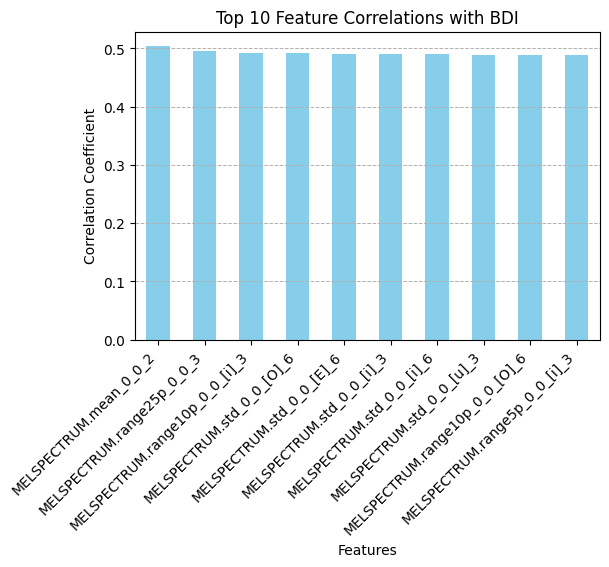

In [7]:
import matplotlib.pyplot as plt
# Selecting the top 10 correlations for plotting
bdi_correlations = bdi_features.head(10)

# Creating the plot
plt.figure(figsize=(6, 4))
bdi_correlations.plot(kind='bar', color='skyblue')

plt.title('Top 10 Feature Correlations with BDI')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()

## Correlation of the Features with Type column

In [8]:
# Check unique values in the Type column
Types = data['Type'].unique()

Types

array(['DE', 'HC'], dtype=object)

In [9]:
# Encode the "Type" column: 'DE' as 1 and 'HC' as 0
data['Type_encoded'] = data['Type'].map({'DE': 1, 'HC': 0})

In [10]:
bdi_index = data.columns.get_loc("BDI")
data.columns[bdi_index + 1:]

Index(['ArticulationRate.raw_0_0', 'EN.mean_0_0', 'EN.mean_0_0_[E]',
       'EN.mean_0_0_[i]', 'EN.mean_0_0_[O]', 'EN.mean_0_0_[u]',
       'EN.range10p_0_0', 'EN.range10p_0_0_[E]', 'EN.range10p_0_0_[i]',
       'EN.range10p_0_0_[O]',
       ...
       'SHIMMER.range5p_0_0_[i]', 'SHIMMER.range5p_0_0_[O]',
       'SHIMMER.range5p_0_0_[u]', 'SHIMMER.std_0_0', 'SHIMMER.std_0_0_[E]',
       'SHIMMER.std_0_0_[i]', 'SHIMMER.std_0_0_[O]', 'SHIMMER.std_0_0_[u]',
       'SilRatio.raw_0_0', 'Type_encoded'],
      dtype='object', length=1421)

In [11]:
# Select the features for correlation calculation
features = data.columns[bdi_index + 1:]

# Calculate the correlation matrix
correlation_matrix = data[features.union(['Type_encoded'])].corr()

# Correctly sorting the Series of correlations by their absolute values
type_correlations = correlation_matrix['Type_encoded'].drop('Type_encoded').abs().sort_values(ascending=False)

# Displaying the top 25 correlations
type_correlations.head(25)

MELSPECTRUM.std_0_0_[O]_6         0.533920
MELSPECTRUM.std_0_0_[i]_6         0.532025
MELSPECTRUM.range10p_0_0_[i]_6    0.530808
MELSPECTRUM.range10p_0_0_[O]_6    0.530278
MELSPECTRUM.std_0_0_[E]_6         0.529909
MELSPECTRUM.range10p_0_0_[E]_6    0.527675
MELSPECTRUM.range5p_0_0_[i]_3     0.527642
MELSPECTRUM.std_0_0_[u]_6         0.526925
MELSPECTRUM.range25p_0_0_[i]_5    0.526796
MELSPECTRUM.std_0_0_[i]_5         0.526488
MELSPECTRUM.range5p_0_0_[i]_2     0.525734
MELSPECTRUM.range10p_0_0_[i]_3    0.525608
MELSPECTRUM.std_0_0_[i]_4         0.525153
MELSPECTRUM.std_0_0_[u]_4         0.524424
MELSPECTRUM.range5p_0_0_[O]_6     0.524058
MELSPECTRUM.std_0_0_[i]_3         0.523909
MELSPECTRUM.range10p_0_0_[u]_6    0.523054
MELSPECTRUM.range10p_0_0_[i]_4    0.522635
MELSPECTRUM.range5p_0_0_[u]_3     0.522631
MELSPECTRUM.range5p_0_0_[i]_6     0.522405
MELSPECTRUM.range25p_0_0_[O]_5    0.521577
MELSPECTRUM.range5p_0_0_[O]_2     0.521167
MELSPECTRUM.range10p_0_0_[i]_5    0.520616
MELSPECTRUM

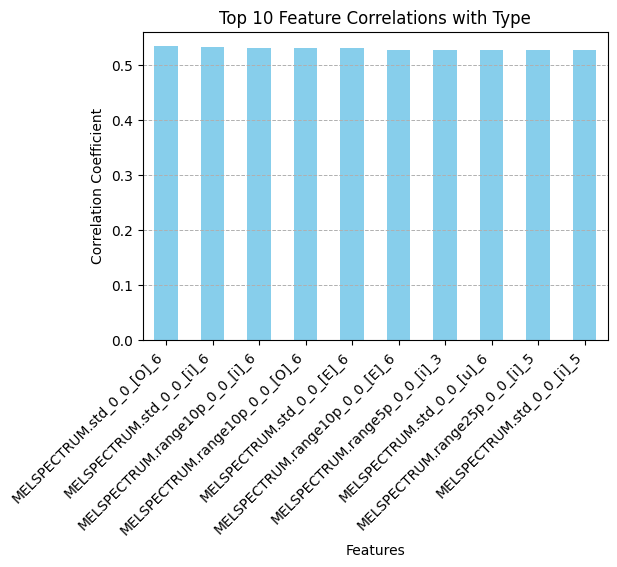

In [12]:
import matplotlib.pyplot as plt
# Selecting the top 10 correlations for plotting
top_correlations = type_correlations.head(10)

# Creating the plot
plt.figure(figsize=(6, 4))
top_correlations.plot(kind='bar', color='skyblue')

plt.title('Top 10 Feature Correlations with Type')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()


##Spearman correlation vs Pearson correlation (for top 10 with BDI)


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Select the top 10 features from the top 25 features
top10_bdi_features = bdi_features.head(10).index.tolist()

# Select these features from the dataset
data_top10_bdi = data[top10_bdi_features + ['BDI']]

# Calculate the Spearman correlation matrix
spearman_corr_matrix_top10_bdi = data_top10_bdi.corr(method='spearman')
print("Top 10 Spearman correlation matrix:")
print(spearman_corr_matrix_top10_bdi)

Top 10 Spearman correlation matrix:
                                MELSPECTRUM.mean_0_0_2  \
MELSPECTRUM.mean_0_0_2                        1.000000   
MELSPECTRUM.range25p_0_0_3                   -0.679384   
MELSPECTRUM.range10p_0_0_[i]_3               -0.665525   
MELSPECTRUM.std_0_0_[O]_6                    -0.651524   
MELSPECTRUM.std_0_0_[E]_6                    -0.648464   
MELSPECTRUM.std_0_0_[i]_3                    -0.662104   
MELSPECTRUM.std_0_0_[i]_6                    -0.649775   
MELSPECTRUM.std_0_0_[u]_3                    -0.658959   
MELSPECTRUM.range10p_0_0_[O]_6               -0.651230   
MELSPECTRUM.range5p_0_0_[i]_3                -0.664236   
BDI                                           0.528434   

                                MELSPECTRUM.range25p_0_0_3  \
MELSPECTRUM.mean_0_0_2                           -0.679384   
MELSPECTRUM.range25p_0_0_3                        1.000000   
MELSPECTRUM.range10p_0_0_[i]_3                    0.937927   
MELSPECTRUM.std_0_0

In [15]:
# Calculate the Pearson correlation matrix
pearson_corr_matrix_top10_bdi = data_top10_bdi.corr(method='pearson')
print("Top 10 Pearson correlation matrix:")
print(pearson_corr_matrix_top10_bdi)


Top 10 Pearson correlation matrix:
                                MELSPECTRUM.mean_0_0_2  \
MELSPECTRUM.mean_0_0_2                        1.000000   
MELSPECTRUM.range25p_0_0_3                   -0.676822   
MELSPECTRUM.range10p_0_0_[i]_3               -0.663619   
MELSPECTRUM.std_0_0_[O]_6                    -0.636593   
MELSPECTRUM.std_0_0_[E]_6                    -0.634737   
MELSPECTRUM.std_0_0_[i]_3                    -0.660640   
MELSPECTRUM.std_0_0_[i]_6                    -0.637547   
MELSPECTRUM.std_0_0_[u]_3                    -0.651984   
MELSPECTRUM.range10p_0_0_[O]_6               -0.633135   
MELSPECTRUM.range5p_0_0_[i]_3                -0.665490   
BDI                                           0.503743   

                                MELSPECTRUM.range25p_0_0_3  \
MELSPECTRUM.mean_0_0_2                           -0.676822   
MELSPECTRUM.range25p_0_0_3                        1.000000   
MELSPECTRUM.range10p_0_0_[i]_3                    0.948705   
MELSPECTRUM.std_0_0_

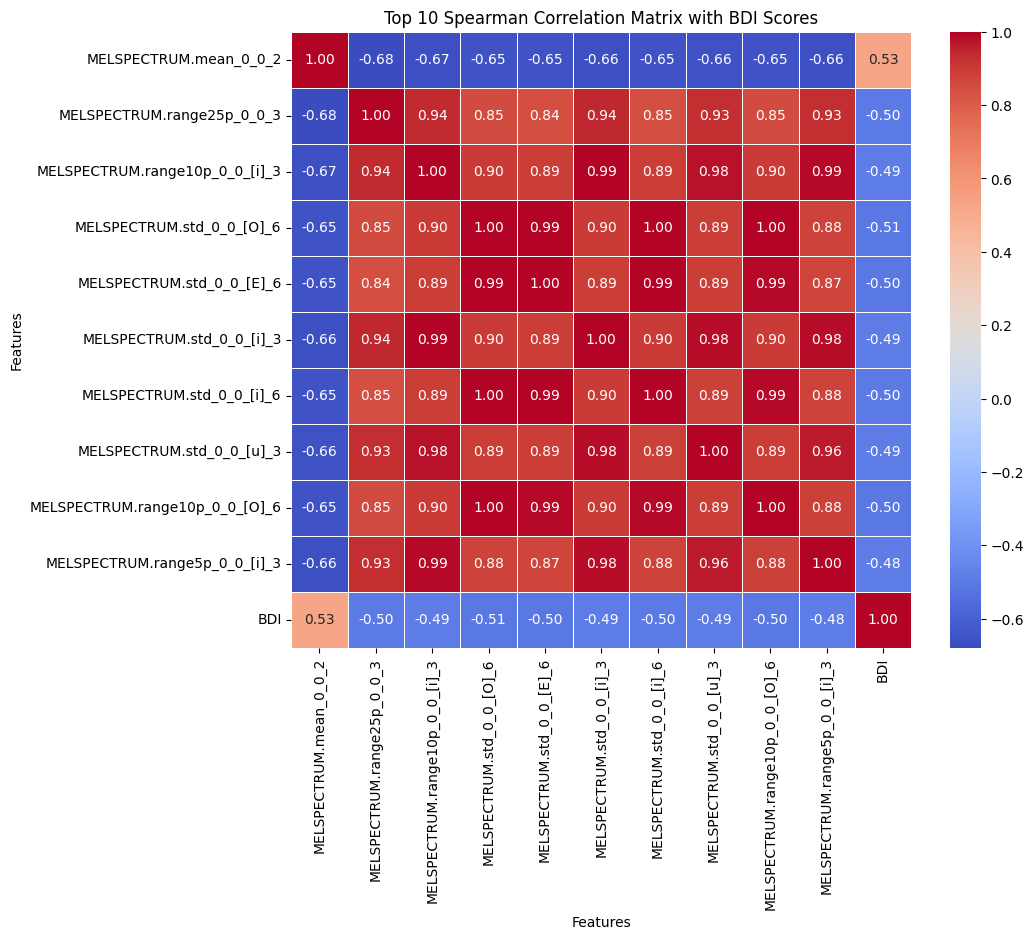

In [16]:
# Visualize Spearman correlation matrix for the top 10 features with BDI scores
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix_top10_bdi, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Top 10 Spearman Correlation Matrix with BDI Scores")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

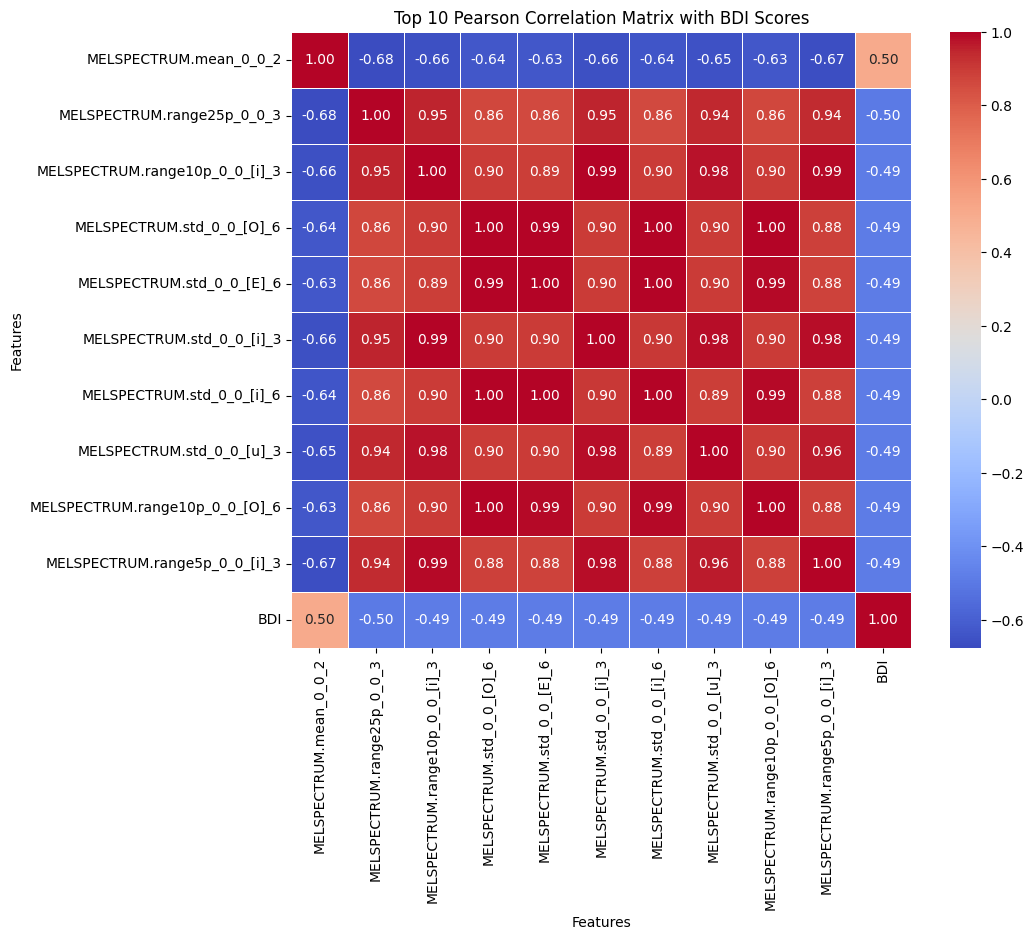

In [17]:
# Visualize Pearson correlation matrix for the top 10 features with BDI scores
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr_matrix_top10_bdi, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Top 10 Pearson Correlation Matrix with BDI Scores")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [18]:
# Saving Spearman correlation matrix to Excel file
#spearman_corr_matrix.to_excel("/content/spearman_correlation_matrix.xlsx", index=True)

# Saving Pearson correlation matrix to Excel file
#pearson_corr_matrix.to_excel("/content/pearson_correlation_matrix.xlsx", index=True)

##  Principal Component Analysis (PCA)

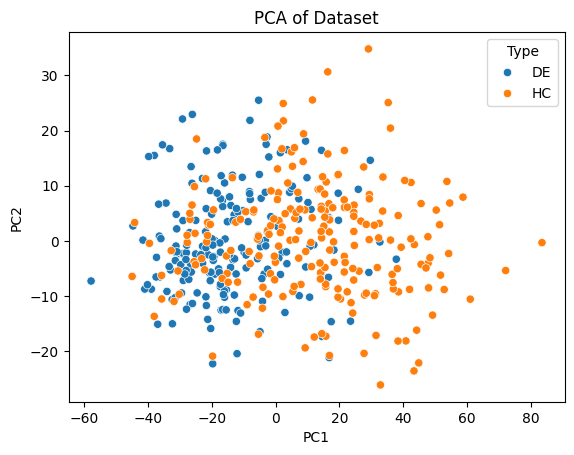

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for PCA (excluding 'Nr.', 'File name', 'Type', and 'Type_encoded')
features_pca = data.drop(['Nr.', 'File name', 'Type','Sex','Age', 'Type_encoded','BDI'], axis=1)
features_pca = scale(features_pca)

# PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_pca)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Concatenate with the Type column for plotting
finalDf = pd.concat([principalDf, data[['Type']]], axis=1)

# Plotting the 2D PCA results
sns.scatterplot(x='PC1', y='PC2', hue='Type', data=finalDf)
plt.title('PCA of Dataset')
plt.show()


## OLS Regression

In [20]:
nan_values = data.isna().sum()
nan_values

Nr.                    0
File name              0
Type                   0
Sex                    0
Age                    6
                      ..
SHIMMER.std_0_0_[i]    0
SHIMMER.std_0_0_[O]    0
SHIMMER.std_0_0_[u]    0
SilRatio.raw_0_0       0
Type_encoded           0
Length: 1427, dtype: int64

In [21]:
rows_with_nan = data[data.isna().any(axis=1)]
rows_with_nan

,Nr.,File name,Type,Sex,Age,BDI,ArticulationRate.raw_0_0,EN.mean_0_0,EN.mean_0_0_[E],EN.mean_0_0_[i],...,SHIMMER.range5p_0_0_[i],SHIMMER.range5p_0_0_[O],SHIMMER.range5p_0_0_[u],SHIMMER.std_0_0,SHIMMER.std_0_0_[E],SHIMMER.std_0_0_[i],SHIMMER.std_0_0_[O],SHIMMER.std_0_0_[u],SilRatio.raw_0_0,Type_encoded
5,6,DE_1_010_M,DE,F,NaN,23.0,8.324394,-11.549580,-11.694085,-11.730991,...,50.636451,42.847297,8.516275,26.530403,24.593688,18.358717,16.114160,29.599981,0.156543,1
6,7,DE_1_011_M,DE,F,NaN,21.0,8.492150,-11.287853,-11.215428,-11.301726,...,26.138468,19.774996,9.241412,18.932779,6.477278,8.476584,8.338586,7.998095,0.160972,1
7,8,DE_1_013_M,DE,F,NaN,37.0,8.831830,-13.101590,-12.955391,-12.620059,...,9.881586,12.997625,6.655185,14.789893,7.465119,3.306216,4.581137,3.099026,0.294199,1
8,9,DE_1_014_M,DE,M,NaN,25.0,7.204664,-13.499662,-12.679373,-12.871391,...,38.245094,42.333332,17.413162,33.458682,12.848439,11.460311,13.464171,9.726606,0.358049,1
10,11,DE_1_016_M,DE,M,NaN,42.0,10.551647,-11.655652,-12.020042,-11.603249,...,26.986436,31.765428,38.528301,30.427477,14.279069,9.210250,12.089116,13.009490,0.110822,1
11,12,DE_1_017_M,DE,F,NaN,32.0,8.189100,-12.568386,-12.682671,-12.275158,...,10.865103,26.718971,10.154594,16.655124,10.182912,4.384755,9.748807,4.285469,0.163218,1
342,343,HC_6_004,HC,F,55.0,NaN,9.822707,-15.024550,-14.566449,-14.000780,...,4.731166,8.428685,4.301499,8.193532,3.658186,1.831026,4.069653,2.547898,0.400843,0
343,344,HC_6_005,HC,F,56.0,NaN,11.529216,-13.323719,-13.212028,-13.389296,...,18.928512,20.120242,3.493190,16.382696,11.157337,6.563192,7.444774,1.665764,0.148081,0
344,345,HC_6_006,HC,M,57.0,NaN,10.939304,-14.964790,-14.812376,-14.764519,...,7.932412,7.181950,10.889970,13.211142,2.373209,2.944050,3.229567,5.166363,0.211039,0
345,346,HC_6_007,HC,F,55.0,NaN,10.814747,-11.878275,-11.543649,-11.342467,...,9.534018,16.749529,2.543822,14.868500,10.973812,3.534179,7.492300,1.108454,0.279567,0


In [22]:
!pip install pandas statsmodels
!pip install scikit-learn

In [23]:
# Handling missing values, e.g., by filling with mean values
data = data.fillna(data.mean())

# Convert the 6th column and onward to float
data.iloc[:, 6:] = data.iloc[:, 6:].astype(float)


<ipython-input-23-2b3bfcca627b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-23-2b3bfcca627b>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 6:] = data.iloc[:, 6:].astype(float)


In [24]:
rows_with_nan = data[data.isna().any(axis=1)]
rows_with_nan

,Nr.,File name,Type,Sex,Age,BDI,ArticulationRate.raw_0_0,EN.mean_0_0,EN.mean_0_0_[E],EN.mean_0_0_[i],...,SHIMMER.range5p_0_0_[i],SHIMMER.range5p_0_0_[O],SHIMMER.range5p_0_0_[u],SHIMMER.std_0_0,SHIMMER.std_0_0_[E],SHIMMER.std_0_0_[i],SHIMMER.std_0_0_[O],SHIMMER.std_0_0_[u],SilRatio.raw_0_0,Type_encoded


In [25]:
import statsmodels.api as sm

# Set independent and dependent variables
X = data.iloc[:, 6:]  # Select variables from the 7th column onward as independent variables
X = X.drop('Type_encoded', axis=1)
y = data['BDI']  # Select the BDI column as the dependent variable

# Add a constant term
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X)
result = model.fit()

# Print the regression results
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    BDI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.344e+22
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           3.83e-12
Time:                        18:30:57   Log-Likelihood:                 10365.
No. Observations:                 413   AIC:                        -1.991e+04
Df Residuals:                       1   BIC:                        -1.825e+04
Df Model:                         411                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [26]:
from sklearn.decomposition import PCA

# Choose the number of principal components or the explained variance ratio
n_components = 0.95

# Create a PCA model
pca = PCA(n_components=n_components)

# Fit the model and transform the data
X_pca = pca.fit_transform(X)

# Print the results of PCA
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.42455013 0.1099048  0.07209746 0.06837328 0.04047924 0.03443937
 0.02069537 0.01927649 0.01636712 0.01530516 0.01456478 0.01340733
 0.01069763 0.00969284 0.00866066 0.00829074 0.00818417 0.00755472
 0.0066529  0.00614471 0.00560047 0.00490942 0.00396697 0.00377927
 0.00353289 0.00349706 0.00322769 0.0028987  0.00276341 0.00254665]


## Mann-Whitney U test

In [27]:
from scipy.stats import mannwhitneyu

In [28]:
features = data.columns[6:]
features = features.drop('Type_encoded')

In [29]:
# Create an empty list to store tuples of feature and p-value
significant_features = []

# Iterate through each feature to perform Mann-Whitney U test
for feature in features:
    data_DE = data[data['Type'] == 'DE'][feature]
    data_HC = data[data['Type'] == 'HC'][feature]

    # Perform Mann-Whitney U test
    statistic, p_value = mannwhitneyu(data_DE, data_HC)

    # Append the feature and p-value to the list
    significant_features.append((feature, p_value))

# Sort the list based on p-values
significant_features.sort(key=lambda x: x[1])

# Print the sorted list
for feature, p_value in significant_features:
    if p_value < 0.05:
        print(f"Feature: {feature}")
        print(f"Mann-Whitney U Statistic: {statistic}")
        print(f"P-Value: {p_value}\n")

Feature: MELSPECTRUM.std_0_0_[O]_6
Mann-Whitney U Statistic: 16659.5
P-Value: 1.3942146364198012e-28

Feature: MELSPECTRUM.range10p_0_0_[O]_6
Mann-Whitney U Statistic: 16659.5
P-Value: 1.8550649109798526e-28

Feature: MELSPECTRUM.range10p_0_0_[i]_6
Mann-Whitney U Statistic: 16659.5
P-Value: 2.8698235869488506e-28

Feature: MELSPECTRUM.std_0_0_[i]_6
Mann-Whitney U Statistic: 16659.5
P-Value: 4.372589646359206e-28

Feature: MELSPECTRUM.std_0_0_[E]_6
Mann-Whitney U Statistic: 16659.5
P-Value: 9.105293531531504e-28

Feature: MELSPECTRUM.range10p_0_0_[E]_6
Mann-Whitney U Statistic: 16659.5
P-Value: 9.702963647411735e-28

Feature: MELSPECTRUM.std_0_0_[u]_6
Mann-Whitney U Statistic: 16659.5
P-Value: 1.0672999483607976e-27

Feature: MELSPECTRUM.range10p_0_0_[u]_6
Mann-Whitney U Statistic: 16659.5
P-Value: 1.693782771721092e-27

Feature: MELSPECTRUM.range5p_0_0_[O]_6
Mann-Whitney U Statistic: 16659.5
P-Value: 1.7246942300538503e-27

Feature: MELSPECTRUM.range5p_0_0_[i]_6
Mann-Whitney U Statisti

# *Variance Inflation Factor*

In [30]:
# Use variance inflation factor to evaluate the colinearity of dataset
# Evaluate the severity of the correlation between all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF_features = data.drop(columns=['Nr.', 'File name', 'Type', 'Sex', 'Age', 'BDI','Type_encoded'])
features_with_constant = add_constant(VIF_features)

vif_data = pd.Series([variance_inflation_factor(features_with_constant.values, i)
                      for i in range(features_with_constant.shape[1])],
                     index=features_with_constant.columns)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [31]:
# After VIF, we found VIF for each feature tends to infinite, it proves there is an extremely huge colinearity between these features
print(vif_data)

const                       0.0
ArticulationRate.raw_0_0    inf
EN.mean_0_0                 inf
EN.mean_0_0_[E]             inf
EN.mean_0_0_[i]             inf
                           ... 
SHIMMER.std_0_0_[E]         inf
SHIMMER.std_0_0_[i]         inf
SHIMMER.std_0_0_[O]         inf
SHIMMER.std_0_0_[u]         inf
SilRatio.raw_0_0            inf
Length: 1421, dtype: float64


# *Importance order of features using RandomForestRegressor*

In [32]:
# After finding the huge colinearity of dataset, we are here to determine which feature has the most important correlation to BDI
from sklearn.ensemble import RandomForestRegressor

# extract the columns we use for fitting the data
RF_data = data.drop(columns=['Nr.', 'File name', 'Type', 'Sex', 'Age', 'BDI','Type_encoded'])
target_data = data['BDI']

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(RF_data, target_data)

# extract the importance of the features
feature_importances = rf_regressor.feature_importances_

# create the DataFrame of feature and its importance
feature_importance_df = pd.DataFrame({"Feature": RF_data.columns, "Importance": feature_importances})

# sort the features by their importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# get top 10 important features
top_10_features = feature_importance_df.head(10)
print(top_10_features)


                             Feature  Importance
356           MELSPECTRUM.mean_0_0_2    0.043955
989        MELSPECTRUM.std_0_0_[u]_4    0.038245
345           MELSPECTRUM.mean_0_0_1    0.026994
988        MELSPECTRUM.std_0_0_[u]_3    0.024731
1393            SHIMMER.mean_0_0_[u]    0.021055
1033             MFCC.mean_0_0_[i]_1    0.019461
990        MELSPECTRUM.std_0_0_[u]_5    0.018956
798    MELSPECTRUM.range5p_0_0_[i]_2    0.014492
408   MELSPECTRUM.range10p_0_0_[i]_2    0.013267
1165          MFCC.range1p_0_0_[O]_1    0.008987


In [33]:
# From the importance order we get from Regressor, we find the Melspecturm Mean and std has a significant correlation with BDI

Correlation of the Features with BDI Scores

# *Logistic Regression*

In [34]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = pd.read_excel("/content/de_hc_adatbázis.xlsx")
# drop the naN rows
data = data.dropna()

X = data.drop(columns=['Nr.', 'File name', 'Type', 'Sex', 'Age', 'BDI'])
y = data["BDI"]

# Define the logistic regression model, apply PCA to reduce the colinearity of dataset
pca = PCA()
logistic = LogisticRegression(max_iter=1000)

# Define the random forest classifier for the selection of important features, meanwhile reducing the redundancy
feature_selection = SelectFromModel(RandomForestClassifier())

# Create the pipeline for PCA, feature selection and logistic regression
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("feature_selection", feature_selection),
    ("pca", pca),
    ("logistic", logistic)
])

# Define the parameter grid for grid searching
param_grid = {
    "feature_selection__estimator__n_estimators": [50, 100, 200],  # number of trees in random forest
    "pca__n_components": [5, 10, 20],  # selection of different pca numbers
    "logistic__C": [0.1, 1.0, 10.0]     # selection of different regularization parameter
}

# Using nested cross validation for evaluating
cv_outer = StratifiedKFold(n_splits=5, shuffle=True)
cv_inner = StratifiedKFold(n_splits=3, shuffle=True)

best_score = 0
best_params = {}

for train_index, test_index in cv_outer.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    grid_search = GridSearchCV(pipeline, param_grid, cv=cv_inner)
    grid_search.fit(X_train, y_train)

    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_

        # Using best parameter for fitting the model in outer loop
        pipeline.set_params(**best_params)
        pipeline.fit(X_train, y_train)

# Evaluate the final model with test set
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)
print("Best parameters found:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs fa

Accuracy on test set: 0.10126582278481013
Best parameters found: {'feature_selection__estimator__n_estimators': 50, 'logistic__C': 10.0, 'pca__n_components': 5}
